In [257]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet

In [258]:
df_train = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_train.csv")
df_train

engine  cycle  setting_1  setting_2  setting_3  \
0           1      1    34.9983     0.8400      100.0   
1           1      2    41.9982     0.8408      100.0   
2           1      3    24.9988     0.6218       60.0   
3           1      4    42.0077     0.8416      100.0   
4           1      5    25.0005     0.6203       60.0   
...       ...    ...        ...        ...        ...   
53754     260    312    20.0037     0.7000      100.0   
53755     260    313    10.0022     0.2510      100.0   
53756     260    314    25.0041     0.6200       60.0   
53757     260    315    25.0033     0.6220       60.0   
53758     260    316    35.0036     0.8400      100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                            449.44                         555.32   
1                            445.00                         549.90   
2                            462.54                         537.31   
3                            445.00                         549.51   
4                            462.54                         537.07   
...                             ...                            ...   
53754                        491.19                         608.79   
53755                        489.05                         605.81   
53756                        462.54                         537.48   
53757                        462.54                         537.84   
53758                        449.44                         556.64   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                            1358.61                        1137.23   
1                            1353.22                        1125.78   
2                            1256.76                        1047.45   
3                            1354.03                        1126.38   
4                            1257.71                        1047.93   
...                              ...                            ...   
53754                        1495.60                        1269.51   
53755                        1514.32                        1324.12   
53756                        1276.24                        1057.92   
53757                        1272.95                        1066.30   
53758                        1374.61                        1145.52   

       (Fan inlet Pressure) (psia)  ...  (Corrected fan speed) (rpm)  \
0                             5.48  ...                      2387.72   
1                             3.91  ...                      2387.66   
2                             7.05  ...                      2028.03   
3                             3.91  ...                      2387.61   
4                             7.05  ...                      2028.00   
...                            ...  ...                          ...   
53754                         9.35  ...                      2389.02   
53755                        10.52  ...                      2388.42   
53756                         7.05  ...                      2030.33   
53757                         7.05  ...                      2030.35   
53758                         5.48  ...                      2390.38   

       (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  \
0                           8048.56           9.3461                     0.02   
1                           8072.30           9.3774                     0.02   
2                           7864.87          10.8941                     0.02   
3                           8068.66           9.3528                     0.02   
4                           7861.23          10.8963                     0.02   
...                             ...              ...                      ...   
53754                       8169.64           9.3035                     0.03   
53755                       8245.36           8.7586                     0.03   
53756                       7971.2

In [259]:
df_test = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_test.csv")
df_test

engine  cycle  setting_1  setting_2  setting_3  \
0           1      1     9.9987     0.2502      100.0   
1           1      2    20.0026     0.7000      100.0   
2           1      3    35.0045     0.8400      100.0   
3           1      4    42.0066     0.8410      100.0   
4           1      5    24.9985     0.6213       60.0   
...       ...    ...        ...        ...        ...   
33986     259    119    35.0015     0.8403      100.0   
33987     259    120    42.0066     0.8405      100.0   
33988     259    121    42.0061     0.8400      100.0   
33989     259    122     0.0024     0.0003      100.0   
33990     259    123    42.0033     0.8400      100.0   

       (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  \
0                            489.05                         605.03   
1                            491.19                         607.82   
2                            449.44                         556.00   
3                            445.00                         550.17   
4                            462.54                         536.72   
...                             ...                            ...   
33986                        449.44                         555.56   
33987                        445.00                         549.42   
33988                        445.00                         549.65   
33989                        518.67                         642.58   
33990                        445.00                         549.77   

       (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  \
0                            1497.17                        1304.99   
1                            1481.20                        1246.11   
2                            1359.08                        1128.36   
3                            1349.69                        1127.89   
4                            1253.18                        1050.69   
...                              ...                            ...   
33986                        1366.01                        1129.47   
33987                        1351.13                        1123.86   
33988                        1349.14                        1118.91   
33989                        1589.61                        1408.16   
33990                        1342.50                        1126.96   

       (Fan inlet Pressure) (psia)  ...  (Corrected fan speed) (rpm)  \
0                            10.52  ...                      2388.18   
1                             9.35  ...                      2388.12   
2                             5.48  ...                      2387.75   
3                             3.91  ...                      2387.72   
4                             7.05  ...                      2028.05   
...                            ...  ...                          ...   
33986                         5.48  ...                      2388.39   
33987                         3.91  ...                      2388.31   
33988                         3.91  ...                      2388.34   
33989                        14.62  ...                      2388.00   
33990                         3.91  ...                      2388.40   

       (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  \
0                           8114.10           8.6476                     0.03   
1                           8053.06           9.2405                     0.02   
2                           8053.04           9.3472                     0.02   
3                           8066.90           9.3961                     0.02   
4                           7865.66          10.8682                     0.02   
...                             ...              ...                      ...   
33986                       8088.36           9.3215                     0.02   
33987                       8108.48           9.3542                     0.02   
33988                       8098.7

In [260]:
# Assume df_train and df_test are already loaded DataFrames with 'RUL' as the target variable
X_train = df_train.drop(columns=['RUL'])
y_train = df_train['RUL']
X_test = df_test.drop(columns=['RUL'])
y_test = df_test['RUL']

In [261]:
# Normalisation

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Model

In [262]:
# Linear Regression
model = ElasticNet(alpha=0.1, l1_ratio=0.6,selection='cyclic')
model.fit(X_train_normalized, y_train)


ElasticNet(alpha=0.1, l1_ratio=0.6)

In [263]:
y_train_pred = model.predict(X_train_normalized)
y_test_pred = model.predict(X_test_normalized)

### Evaluation

In [264]:
#MSE -train
def mse_tr(y_train, y_train_pred):
    mse = mean_squared_error(y_train, y_train_pred)
    return (f'Mean Squared Error - Train: {mse}')
mse_tr(y_train, y_train_pred)

'Mean Squared Error - Train: 2912.454277488725'

In [265]:
# R-squared evaluation - train
def r2_tr(y_train, y_train_pred):
    r_squared = r2_score(y_train, y_train_pred)
    return (f'R-squared - Train: {r_squared}')
r2_tr(y_train, y_train_pred)

'R-squared - Train: 0.3914462535225024'

In [266]:
#MSE -test
def mse_tt(y_test, y_test_pred):
    mse = mean_squared_error(y_test, y_test_pred)
    return (f'Mean Squared Error - Test: {mse}')
mse_tt(y_test, y_test_pred)

'Mean Squared Error - Test: 5109.140312480536'

In [267]:
# R-squared evaluation - test
def r2_tt(y_test, y_test_pred):
    r_squared = r2_score(y_test, y_test_pred)
    return (f'R-squared - Test: {r_squared}')
r2_tt(y_test, y_test_pred)

'R-squared - Test: -1.1181768448001033'

### Visualise Results

In [268]:
# Create a figure
fig = go.Figure()

# Add actual values (blue circles)
fig.add_trace(go.Scatter(x=list(range(len(y_test))),y=y_test,mode='markers',name='Actual RUL',marker=dict(color='blue', symbol='circle', size=8)))

# Add predicted values (orange crosses)
fig.add_trace(go.Scatter(x=list(range(len(y_test_pred))),y=y_test_pred,mode='markers',name='Predicted RUL',  marker=dict(color='orange', symbol='circle', size=8)))

# Add ideal prediction line (red line)
fig.add_trace(go.Scatter(x=list(range(len(y_test))),y=y_test,mode='lines',name='Ideal Prediction',line=dict(color='red')))

# Update layout
fig.update_layout(title='Linear Regression: Actual vs Predicted RUL', xaxis_title='Data Points',yaxis_title='RUL',legend=dict(x=0, y=1.1, orientation='h'),width=800,height=600)

# Show plot
fig.show()

### Inference

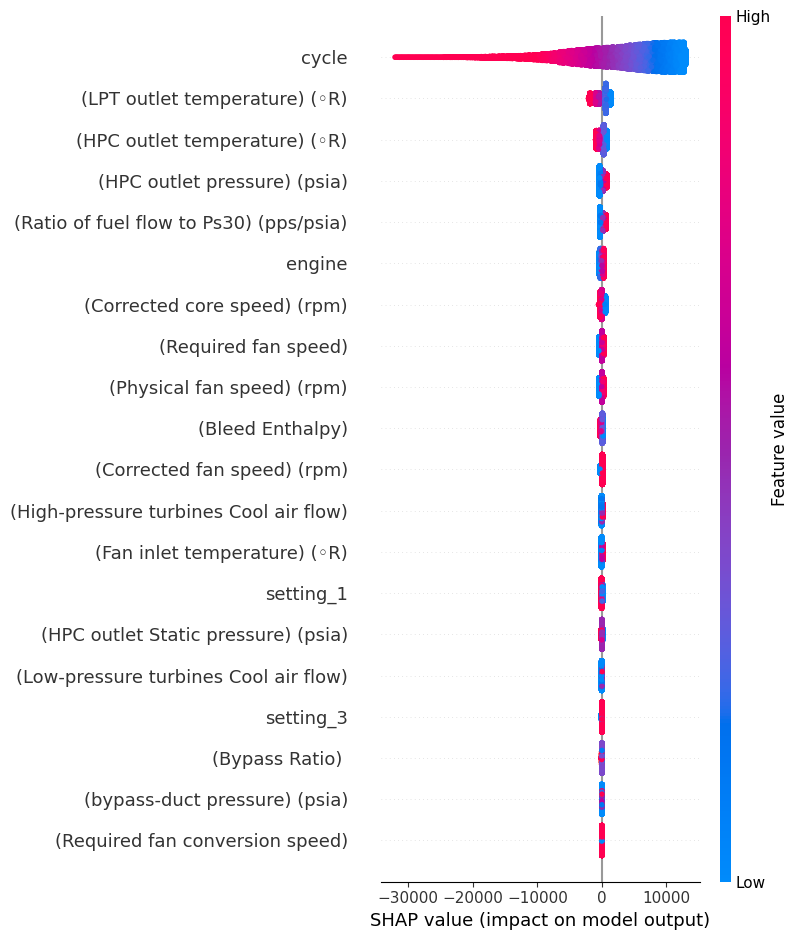

In [269]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

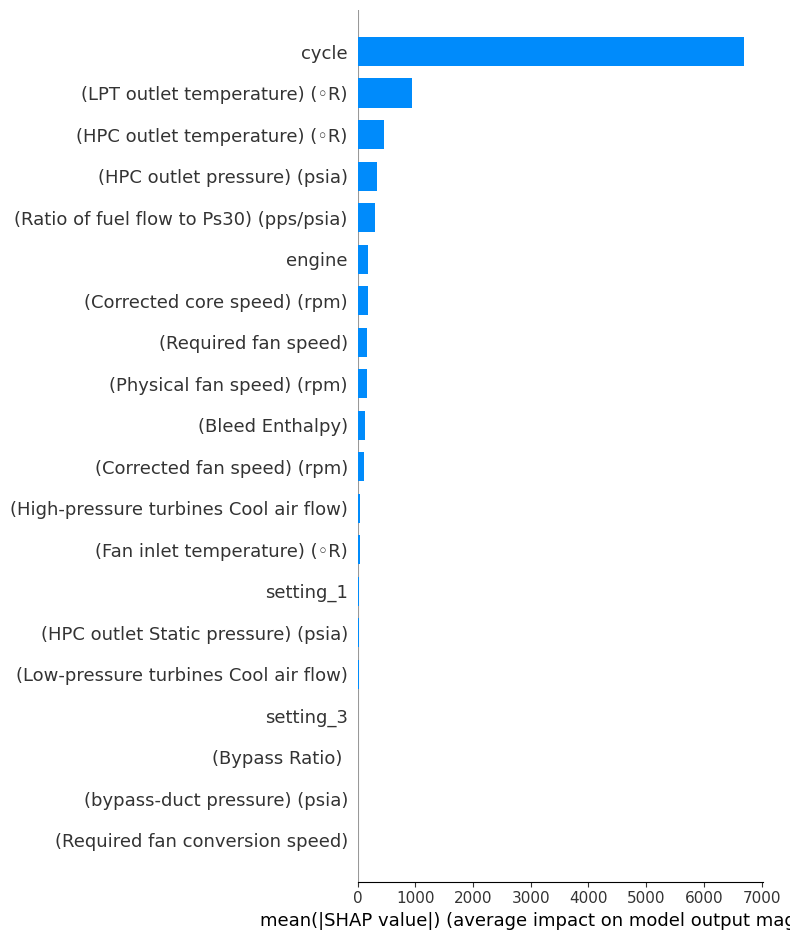

In [270]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [271]:
# Calculate mean absolute SHAP values for each feature
import numpy as np
feature_importance = np.mean(np.abs(shap_values.values), axis=0)

# Sort features by importance
important_features = pd.DataFrame({
    'feature': X_test.columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Display the most important features
print(important_features.head(10))

                                    feature   importance
1                                     cycle  6692.304137
8             (LPT outlet temperature) (◦R)   935.905578
7             (HPC outlet temperature) (◦R)   465.959390
11             (HPC outlet pressure) (psia)   333.218112
16  (Ratio of fuel flow to Ps30) (pps/psia)   303.889161
0                                    engine   185.986388
18             (Corrected core speed) (rpm)   171.917848
22                     (Required fan speed)   166.722940
12               (Physical fan speed) (rpm)   154.318217
21                         (Bleed Enthalpy)   123.423107


### Rebuild after Inference

In [272]:
important_features = important_features.head(10)['feature'].tolist()  # Keep top 10 features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [273]:
# Linear Regression
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_reduced, y_train)

/Users/aswathshakthi/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.810e+07, tolerance: 2.573e+04



ElasticNet()

In [274]:
import joblib

# Assuming `model` is your trained model
joblib.dump(model, '/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/models/linreg.pkl')

['/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/models/linreg.pkl']

In [275]:
# Load the model
model = joblib.load('/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/models/linreg.pkl')

In [276]:
y_train_pred = model.predict(X_train_reduced)
y_test_pred = model.predict(X_test_reduced)

In [277]:
mse_tr(y_train, y_train_pred)

'Mean Squared Error - Train: 2087.686382564978'

In [278]:
mse_tt(y_test, y_test_pred)

'Mean Squared Error - Test: 7176.719553806536'

In [279]:
r2_tr(y_train, y_train_pred)

'R-squared - Train: 0.5637804928304526'

In [280]:
r2_tt(y_test, y_test_pred)

'R-squared - Test: -1.9753657662059059'

In [281]:
## linear regression preditions are not good as there are many features and no linear relations can be found. we tried shap to select top features and and trained them, although it reduced mse and r2 still the values are high. we can try preprocessing and with regualrization L1,L2, scaling/normalisation. But i hope that will not produce promising results. so we move to next algorithms.